# Linear Models


## Assignment 2 (Deadline : 22/10/2020 11:59PM)

Total Points : 50

### Import necessary modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

### 1. Read the data into numpy array

In [2]:
# Read data from file: 'data.csv'. 
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt".
df = pd.read_csv('data.csv', skiprows = 1, header = None)
df.head()

,0,1,2
0,51.87,79.72,1249.99
1,-30.66,-15.64,-516.61
2,-57.57,94.22,312.09
3,-122.10,5.15,-1544.90
4,-53.45,41.87,-201.57


In [3]:
# find correlation between variables
df.corr()

,0,1,2
0,1.000000,0.499028,0.890029
1,0.499028,1.000000,0.786392
2,0.890029,0.786392,1.000000


In [4]:
# set the column names of the dataframe
df.columns = ['x_1', 'x_2', 'y']
df.head()

,x_1,x_2,y
0,51.87,79.72,1249.99
1,-30.66,-15.64,-516.61
2,-57.57,94.22,312.09
3,-122.10,5.15,-1544.90
4,-53.45,41.87,-201.57


In [5]:
# basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     3000 non-null   float64
 1   x_2     3000 non-null   float64
 2   y       3000 non-null   float64
dtypes: float64(3)
memory usage: 70.4 KB


In [6]:
# description of the dataset
df.describe()

,x_1,x_2,y
count,3000.000000,3000.00000,3000.000000
mean,-18.483293,31.24422,-11.450140
std,34.398479,42.99015,662.873355
min,-140.710000,-132.18000,-2325.790000
25%,-40.392500,3.38250,-446.140000
50%,-18.485000,31.34500,-17.680000
75%,4.125000,60.59000,429.782500
max,93.930000,189.99000,2198.490000


### 2. Plot and Explore the data to get a better understanding

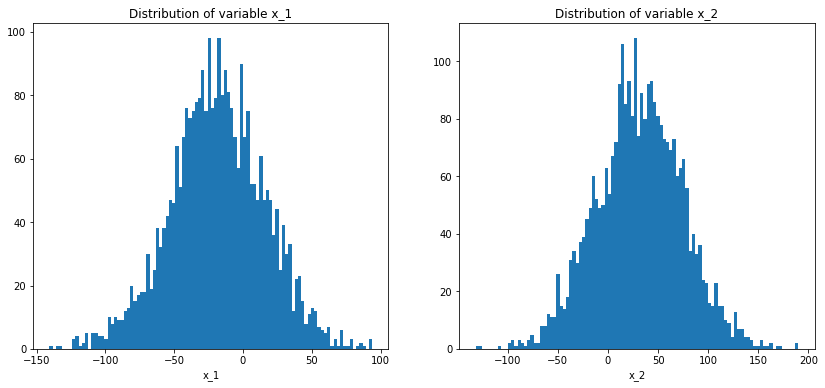

In [7]:
# let's plot the distribution of x_1 and x_2
fig, ax = plt.subplots(1, 2,figsize = (14, 6))

ax[0].hist(df.x_1, bins = 100);
ax[0].set(title = 'Distribution of variable x_1', xlabel = 'x_1')

ax[1].hist(df.x_2, bins = 100);
ax[1].set(title = 'Distribution of variable x_2', xlabel = 'x_2');

#### As can be seen from the above plots both the variables x_1 and x_2 are normally distributed

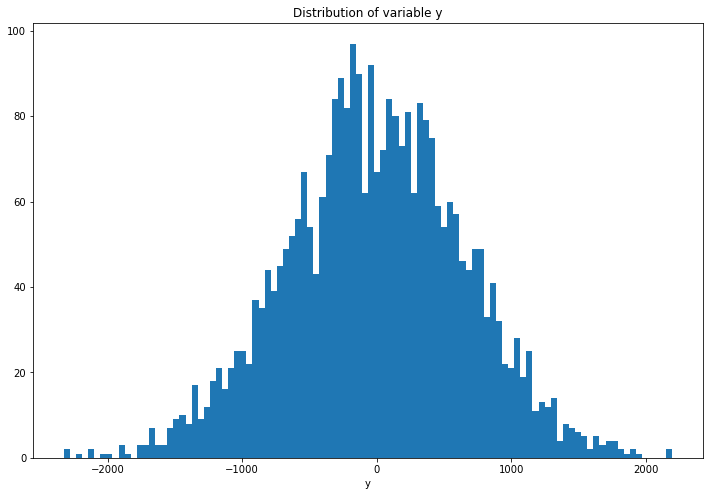

In [8]:
# let's plot the distribution of y
fig, ax = plt.subplots(figsize = (12, 8))

ax.hist(df.y, bins = 100);
ax.set(title = 'Distribution of variable y', xlabel = 'y');

#### As can be seen from the above plot target variable is also normally distributed

### 3. Prepare the data for modelling. (8 points)

In [9]:
# Separate the data: input and output.
X = df[['x_1', 'x_2']]
Y = df.y.values

In [10]:
# Perform a train-val-test split of 60-20-20.
# Use "random_state=42".
# For your reference: you can use "train_test_split" from sklearn twice to perform this. 
# From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not?
x, test_x, y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 42)
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(f"train_x shape: {train_x.shape}\ntrain_y shape = {train_y.shape}")
print(f"val_x shape: {val_x.shape}\nval_y shape = {val_y.shape}")
print(f"test_x shape: {test_x.shape}\ntest_y shape = {test_y.shape}")

train_x shape: (1800, 2)
train_y shape = (1800,)
val_x shape: (600, 2)
val_y shape = (600,)
test_x shape: (600, 2)
test_y shape = (600,)


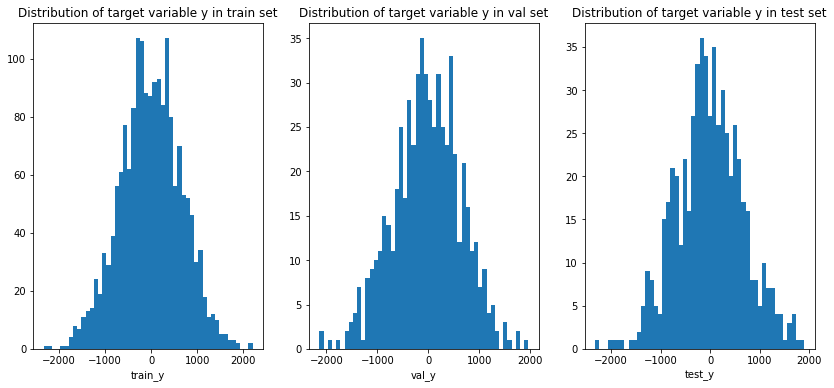

In [11]:
# Let's check the distribution of target variable in the train, val and test set
# let's plot the distribution of y
fig, ax = plt.subplots(1, 3, figsize = (14, 6))

ax[0].hist(train_y, bins = 50)
ax[0].set(title = 'Distribution of target variable y in train set', xlabel = 'train_y')

ax[1].hist(val_y, bins = 50)
ax[1].set(title = 'Distribution of target variable y in val set', xlabel = 'val_y')

ax[2].hist(test_y, bins = 50)
ax[2].set(title = 'Distribution of target variable y in test set', xlabel = 'test_y');

**Observations:** 
- Distribution of target variable in train, validation and test set is similar. 

### 4. Modelling

#### 4.1. Linear Regression (8 points)

In [12]:
# Implement Linear Regression.
# Use both train and val data for training purpose.
# Make preditions on both training(train+val) and test data.

linear_model = LinearRegression()    # instantiate linear model
linear_model.fit(x, y)               # fit the model

pred_y = linear_model.predict(x)            # make predictions on train + val data
pred_test = linear_model.predict(test_x)    # make predictions on test data

print(f"Root Mean Squared Error on (train + val) data: {round(np.sqrt(mean_squared_error(y, pred_y)), 3)}")
print(f"Mean Absolute Error on (train + val) data: {round(mean_absolute_error(y, pred_y), 3)}")

print(f"Root Mean Squared Error on test data: {round(np.sqrt(mean_squared_error(test_y, pred_test)), 3)}")
print(f"Mean Absolute Error on test data: {round(mean_absolute_error(test_y, pred_test), 3)}")

Root Mean Squared Error on (train + val) data: 151.588
Mean Absolute Error on (train + val) data: 120.78
Root Mean Squared Error on test data: 148.474
Mean Absolute Error on test data: 118.729


#### 4.2. Ridge Regression (8 points)

In [13]:
# Implement Ridge Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
lambda_val = np.arange(0, 1.1, 0.1)

for alpha in lambda_val:
    ridge_model = Ridge(alpha = alpha)
    ridge_model.fit(train_x, train_y)
    
    print(f"Root Mean Squared Error on val data for lambda = {round(alpha, 2)} is: \
          {round(np.sqrt(mean_squared_error(val_y, ridge_model.predict(val_x))), 3)}")
    print(f"Mean Absolute Error on val data for lambda = {round(alpha, 2)} is: \
          {round(mean_absolute_error(val_y, ridge_model.predict(val_x)), 3)}")

Root Mean Squared Error on val data for lambda = 0.0 is:           155.347
Mean Absolute Error on val data for lambda = 0.0 is:           123.179
Root Mean Squared Error on val data for lambda = 0.1 is:           155.347
Mean Absolute Error on val data for lambda = 0.1 is:           123.179
Root Mean Squared Error on val data for lambda = 0.2 is:           155.347
Mean Absolute Error on val data for lambda = 0.2 is:           123.179
Root Mean Squared Error on val data for lambda = 0.3 is:           155.347
Mean Absolute Error on val data for lambda = 0.3 is:           123.179
Root Mean Squared Error on val data for lambda = 0.4 is:           155.347
Mean Absolute Error on val data for lambda = 0.4 is:           123.179
Root Mean Squared Error on val data for lambda = 0.5 is:           155.347
Mean Absolute Error on val data for lambda = 0.5 is:           123.179
Root Mean Squared Error on val data for lambda = 0.6 is:           155.347
Mean Absolute Error on val data for lambda = 0.6 

### We obtained almost identical RMSE values for regularization parameter in the range(0.1, 1)
- Let's use alpha = 1 to fit our ridge regression model on the train + val data

In [14]:
ridge_model = Ridge(alpha = 1)
ridge_model.fit(x, y)

pred_y = ridge_model.predict(x)
pred_test = ridge_model.predict(test_x)

print(f"Root Mean Squared Error on (train + val) data: {round(np.sqrt(mean_squared_error(y, pred_y)), 3)}")
print(f"Mean Absolute Error on (train + val) data: {round(mean_absolute_error(y, pred_y), 3)}")

print(f"Root Mean Squared Error on test data: {round(np.sqrt(mean_squared_error(test_y, pred_test)), 3)}")
print(f"Mean Absolute Error on test data: {round(mean_absolute_error(test_y, pred_test), 3)}")

Root Mean Squared Error on (train + val) data: 151.588
Mean Absolute Error on (train + val) data: 120.78
Root Mean Squared Error on test data: 148.474
Mean Absolute Error on test data: 118.729


#### 4.3. Lasso Regression (8 points)

In [15]:
# Implement Lasso Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
lambda_val = np.arange(0.1, 1.1, 0.1)

for alpha in lambda_val:
    lasso_model = Lasso(alpha = alpha)
    lasso_model.fit(train_x, train_y)
    
    print(f"Root Mean Squared Error on val data for lambda = {round(alpha, 2)} is: \
          {round(np.sqrt(mean_squared_error(val_y, lasso_model.predict(val_x))), 3)}")
          
    print(f"Mean Absolute Error on val data for lambda = {round(alpha, 2)} is: \
          {round(mean_absolute_error(val_y, lasso_model.predict(val_x)), 3)}")

Root Mean Squared Error on val data for lambda = 0.1 is:           155.347
Mean Absolute Error on val data for lambda = 0.1 is:           123.179
Root Mean Squared Error on val data for lambda = 0.2 is:           155.347
Mean Absolute Error on val data for lambda = 0.2 is:           123.179
Root Mean Squared Error on val data for lambda = 0.3 is:           155.347
Mean Absolute Error on val data for lambda = 0.3 is:           123.179
Root Mean Squared Error on val data for lambda = 0.4 is:           155.347
Mean Absolute Error on val data for lambda = 0.4 is:           123.179
Root Mean Squared Error on val data for lambda = 0.5 is:           155.347
Mean Absolute Error on val data for lambda = 0.5 is:           123.179
Root Mean Squared Error on val data for lambda = 0.6 is:           155.347
Mean Absolute Error on val data for lambda = 0.6 is:           123.179
Root Mean Squared Error on val data for lambda = 0.7 is:           155.347
Mean Absolute Error on val data for lambda = 0.7 

### We obtained almost identical RMSE values for regularization parameter in the range(0.1, 1)
- Let's use alpha = 1 to fit our lasso regression model on the train + val data

In [16]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(x, y)
pred_y = lasso_model.predict(x)
pred_test = lasso_model.predict(test_x)

print(f"Root Mean Squared Error on (train + val) data: {round(np.sqrt(mean_squared_error(y, pred_y)), 3)}")
print(f"Mean Absolute Error on (train + val) data: {round(mean_absolute_error(y, pred_y), 3)}")

print(f"Root Mean Squared Error on test data: {round(np.sqrt(mean_squared_error(test_y, pred_test)), 3)}")
print(f"Mean Absolute Error on test data: {round(mean_absolute_error(test_y, pred_test), 3)}")

Root Mean Squared Error on (train + val) data: 151.588
Mean Absolute Error on (train + val) data: 120.78
Root Mean Squared Error on test data: 148.473
Mean Absolute Error on test data: 118.728


#### 4.4. ElasticNet Regression (8 points)

In [17]:
# Implement ElasticNet Regression.
# Perform cross validation to find a good value for your hyper-parameters.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
lambda_val = np.arange(0.1, 1.1, 0.1)

for alpha in lambda_val:
    enet_model = ElasticNet(l1_ratio = 0.5, alpha = alpha)
    enet_model.fit(train_x, train_y)
    print(f"Root Mean Squared Error on val data for lambda = {round(alpha, 2)} is: \
          {round(np.sqrt(mean_squared_error(val_y, enet_model.predict(val_x))), 3)}")
    
    print(f"Mean Absolute Error on val data for lambda = {round(alpha, 2)} is: \
          {round(mean_absolute_error(val_y, enet_model.predict(val_x)), 3)}")

Root Mean Squared Error on val data for lambda = 0.1 is:           155.347
Mean Absolute Error on val data for lambda = 0.1 is:           123.179
Root Mean Squared Error on val data for lambda = 0.2 is:           155.346
Mean Absolute Error on val data for lambda = 0.2 is:           123.179
Root Mean Squared Error on val data for lambda = 0.3 is:           155.346
Mean Absolute Error on val data for lambda = 0.3 is:           123.179
Root Mean Squared Error on val data for lambda = 0.4 is:           155.346
Mean Absolute Error on val data for lambda = 0.4 is:           123.179
Root Mean Squared Error on val data for lambda = 0.5 is:           155.346
Mean Absolute Error on val data for lambda = 0.5 is:           123.179
Root Mean Squared Error on val data for lambda = 0.6 is:           155.345
Mean Absolute Error on val data for lambda = 0.6 is:           123.179
Root Mean Squared Error on val data for lambda = 0.7 is:           155.345
Mean Absolute Error on val data for lambda = 0.7 

### We obtained almost identical RMSE values for regularization parameter in the range(0.1, 1)
- Let's use alpha = 1 to fit our lasso regression model on the train + val data

In [18]:
enet_model = ElasticNet(l1_ratio = 0.5, alpha = 1)
enet_model.fit(x, y)

pred_y = enet_model.predict(x)
pred_test = enet_model.predict(test_x)

print(f"Root Mean Squared Error on (train + val) data: {round(np.sqrt(mean_squared_error(y, pred_y)), 3)}")
print(f"Mean Absolute Error on (train + val) data: {round(mean_absolute_error(y, pred_y), 3)}")

print(f"Root Mean Squared Error on test data: {round(np.sqrt(mean_squared_error(test_y, pred_test)), 3)}")
print(f"Mean Absolute Error on test data: {round(mean_absolute_error(test_y, pred_test), 3)}")

Root Mean Squared Error on (train + val) data: 151.588
Mean Absolute Error on (train + val) data: 120.783
Root Mean Squared Error on test data: 148.476
Mean Absolute Error on test data: 118.734


### 5. Analysis (8 points)

In [19]:
# Write down the actual value along with the preditions from all the regression models, for the first 10 points in test data.
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.

test_x_10 = test_x[:10]    # select 10 data point from test set for prediction
test_y_10 = test_y[:10]    # actula targets for 10 data points

pred_linear_10 = linear_model.predict(test_x_10)    # linear model prediction
pred_ridge_10 = ridge_model.predict(test_x_10)      # ridge model prediction
pred_lasso_10 = lasso_model.predict(test_x_10)      # lasso model prediction
pred_enet_10 = enet_model.predict(test_x_10)        # elastic net model prediction

print('Different linear models prediction for 10 points in the test set')
pred_10 = pd.DataFrame({'Actual': test_y_10, 'Pred_Linear': pred_linear_10, 'Pred_Ridge': pred_ridge_10, 'Pred_Lasso': pred_lasso_10, 'Pred_Elastic':pred_enet_10})

pred_10

Different linear models prediction for 10 points in the test set


,Actual,Pred_Linear,Pred_Ridge,Pred_Lasso,Pred_Elastic
0,66.12,61.235630,61.235624,61.232172,61.226848
1,-572.89,-576.474002,-576.474023,-576.443849,-576.479017
2,-94.71,-112.489283,-112.489297,-112.483376,-112.501485
3,-306.84,-413.460170,-413.460033,-413.446708,-413.293023
4,580.10,602.521612,602.521358,602.503390,602.215408
5,-34.05,-19.808152,-19.808103,-19.810322,-19.752688
6,-81.37,-172.968197,-172.968100,-172.964998,-172.854030
7,552.60,601.278257,601.278079,601.256109,601.057385
8,-24.39,-42.406417,-42.406532,-42.398794,-42.534678
9,538.47,558.283905,558.283791,558.260559,558.137315


### RMSE and MAE for all models on (train + val) and test set have been printed in the corresponding model section 

### 6. Final Observations (2 points)

In [ ]:
# Write down your final conclusions/observations.

- All four models (Linear, Ridge, Lasso and Elastic Net) resulted in the same MAE and RMSE on the (train + val) and test set.
- Even different values of regularization parameter resulted in the same MAE and MSE on the validation and test set.

- It appears that this data has been sampled from normal distribution. 
- Since regularization parameter has no effect on the MAE and MSE, linear model without regularization doesn't overfit.